<a href="https://colab.research.google.com/github/gridface/ml-technical-analysis/blob/main/centaur_portfolio_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Analysis with Pandas

## Define Your Variables

In [1]:
#here we define an array of stock tickers that will be fed into our program.
#change these tickers as desired
portfolio = ["ZIM", "T", "MOS", "VALE", "ENB", "ADM" ]

#what period do you want to evaluate?
# use "period" instead of start/end
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# (optional, default is '1mo')
per = "1y"

## Notebook Setup

In [2]:
# use this line to install the yahoo finance api library. 
# Note that the official yahoo finance api is defunct, and this new library called "yfinance" has taken its place
!pip install yfinance

# once it is installed, we can import it like any other installed library
#pandas and matplotlib libraries are already part of colab, so we just import them
import pandas as pd, matplotlib.pyplot as plt, yfinance as yf

#general note on running notebooks: if you get an "undefined" type error, remember that you have to 
#run each of the cells in order sequentially first in order to "define" the variables
#and execute the commands. so if you get the "undefined" error, go back up and make sure you 
#have run all the lines that came before your troublesome line of code


     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Get Your Portfolio Data

In [3]:
#notice the format of this data - it has a two-tiered header - [measurement]/[ticker]
# we will be changing this around below to make it easier to work with
stocks = yf.download(portfolio,period=per)
#convert the time index to datetime type. this lets us do special date functions
pd.to_datetime(stocks.iloc[0])

[*********************100%***********************]  6 of 6 completed


Adj Close  ADM    1970-01-01 00:00:00.000000061
           ENB    1970-01-01 00:00:00.000000036
           MOS    1970-01-01 00:00:00.000000034
           T      1970-01-01 00:00:00.000000022
           VALE   1970-01-01 00:00:00.000000017
           ZIM    1970-01-01 00:00:00.000000027
Close      ADM    1970-01-01 00:00:00.000000063
           ENB    1970-01-01 00:00:00.000000038
           MOS    1970-01-01 00:00:00.000000035
           T      1970-01-01 00:00:00.000000023
           VALE   1970-01-01 00:00:00.000000020
           ZIM    1970-01-01 00:00:00.000000037
High       ADM    1970-01-01 00:00:00.000000063
           ENB    1970-01-01 00:00:00.000000038
           MOS    1970-01-01 00:00:00.000000036
           T      1970-01-01 00:00:00.000000023
           VALE   1970-01-01 00:00:00.000000020
           ZIM    1970-01-01 00:00:00.000000038
Low        ADM    1970-01-01 00:00:00.000000062
           ENB    1970-01-01 00:00:00.000000038
           MOS    1970-01-01 00:00:00.00

In [4]:
#this step flattens out the index 
stocks.columns = stocks.columns.to_flat_index()

#creates a multiindex for better sorting and grouping of data
# check this link for more info https://pandas.pydata.org/docs/user_guide/advanced.html
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)

#lets switch levels now so we can group on individual stocks at the top level
stocks.swaplevel(axis = 1).sort_index(axis=1)

ADM                                                       \
            Adj Close      Close       High        Low       Open   Volume   
Date                                                                         
2021-04-30  61.741192  63.130001  63.430000  62.689999  63.430000  3332000   
2021-05-03  63.208183  64.629997  64.910004  63.709999  63.860001  3359700   
2021-05-04  63.667843  65.099998  65.419998  64.489998  64.599998  3015400   
2021-05-05  64.743652  66.199997  66.279999  64.839996  65.300003  3453100   
2021-05-06  65.222870  66.690002  66.860001  65.660004  66.599998  3417700   
...               ...        ...        ...        ...        ...      ...   
2022-04-25  90.959999  90.959999  91.750000  88.760002  91.500000  5029800   
2022-04-26  90.639999  90.639999  95.970001  89.959999  94.610001  7081100   
2022-04-27  93.919998  93.919998  95.550003  89.620003  92.809998  7217600   
2022-04-28  92.510002  92.510002  94.730003  91.160004  94.669998  5018200   
2022-04-29  89.559998  89.559998  92.730003  89.389999  91.980003  6340900   

                  ENB                                   ...       VALE  \
            Adj Close      Close       High        Low  ...       High   
Date                                                    ...              
2021-04-30  36.115135  38.570000  38.650002  38.220001  ...  20.760000   
2021-05-03  36.302406  38.770000  38.939999  38.549999  ...  20.350000   
2021-05-04  36.499039  38.980000  39.009998  38.700001  ...  20.540001   
2021-05-05  37.397938  39.939999  40.029999  39.160000  ...  21.000000   
2021-05-06  37.257484  39.790001  40.099998  39.549999  ...  21.900000   
...               ...        ...        ...        ...  ...        ...   
2022-04-25  44.150002  44.150002  44.430000  43.180000  ...  16.299999   
2022-04-26  43.759998  43.759998  44.330002  43.730000  ...  15.980000   
2022-04-27  43.820000  43.820000  44.169998  43.439999  ...  16.559999   
2022-04-28  44.610001  44.610001  44.869999  43.880001  ...  17.150000   
2022-04-29  43.639999  43.639999  44.860001  43.520000  ...  17.760000   

                                                  ZIM                        \
                  Low       Open    Volume  Adj Close      Close       High   
Date                                                                          
2021-04-30  20.020000  20.580000  36748500  27.464359  37.450001  38.220001   
2021-05-03  20.059999  20.180000  22234200  28.190386  38.439999  40.000000   
2021-05-04  19.969999  20.000000  28749600  29.085087  39.660000  39.849998   
2021-05-05  20.629999  20.870001  26637300  30.749815  41.930000  42.990002   
2021-05-06  21.000000  21.129999  40997500  28.879747  39.380001  42.005001   
...               ...        ...       ...        ...        ...        ...   
2022-04-25  15.700000  16.139999  56363600  51.459999  51.459999  53.290001   
2022-04-26  15.570000  15.920000  48071200  52.599998  52.599998  53.930000   
2022-04-27  15.950000  16.120001  60351400  56.619999  56.619999  57.169998   
2022-04-28  16.219999  16.400000  46759200  57.570000  57.570000  58.465000   
2022-04-29  16.870001  17.570000  47736600  55.630001  55.630001  59.270000   

                                           
                  Low       Open   Volume  
Date                                       
2021-04-30  34.599998  35.250000  1055800  
2021-05-03  37.830002  38.419998  1317100  
2021-05-04  35.560001  38.439999  1729800  
2021-05-05  39.740002  40.049999  2149900  
2021-05-06  37.549999  41.900002  1985300  
...               ...        ...      ...  
2022-04-25  48.209999  53.150002  8309100  
2022-04-26  51.549999  53.480000  4192700  
2022-04-27  53.150002  53.230000  4651400  
2022-04-28  55.362000  57.720001  3667400  
2022-04-29  55.459999  57.990002  2539400  

[253 rows x 36 columns]

## Create Analytical Fields

In [5]:
close = stocks['Close'].copy()

In [6]:
len(close.columns)


6

In [8]:
# close['ZIM_MA10'] = close['ZIM'].rolling(10).mean()
# data['%-chg'] = data['Close'].pct_change()
# data['Log returns'] = np.log(data['Close']/data['Close'].shift())
# data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()

import numpy as np

def moving_averages(Data):
  for i in range(len(Data.columns)):
    try:
      Data[str(Data.columns[i]) + '_MA10'] = Data[Data.columns[i]].rolling(span=10, adjust=False).mean()
      Data[str(Data.columns[i]) + '_MA50'] = Data[Data.columns[i]].rolling(span=50, adjust=False).mean()
      Data[str(Data.columns[i]) + '_MA200'] = Data[Data.columns[i]].rolling(span=200, adjust=False).mean()
    except ValueError:
      pass
  return Data

def exp_moving_averages(Data):
  for i in range(len(Data.columns)):
    try:
      Data[str(Data.columns[i]) + '_EMA10'] = Data[Data.columns[i]].ewm(span=10, adjust=False).mean()
      Data[str(Data.columns[i]) + '_EMA50'] = Data[Data.columns[i]].ewm(span=50, adjust=False).mean()
      Data[str(Data.columns[i]) + '_EMA200'] = Data[Data.columns[i]].ewm(span=200, adjust=False).mean()
    except ValueError:
      pass
  return Data


def pct_change(Data):
  for i in range(len(Data.columns)):
    try:
      Data[str(Data.columns[i]) + '_pct_change'] = Data[Data.columns[i]].pct_change()
    except ValueError:
      pass
  return Data

def log_returns(Data):
  for i in range(len(Data.columns)):
    try:
      Data[str(Data.columns[i]) + '_log_returns'] = np.log(Data[Data.columns[i]]/Data[Data.columns[i]].shift())
    except ValueError:
      pass
  return Data

def log_returns(Data):
  for i in range(len(Data.columns)):
    try:
      Data[str(Data.columns[i]) + '_log_returns'] = np.log(Data[Data.columns[i]]/Data[Data.columns[i]].shift())
    except ValueError:
      pass
  return Data

In [ ]:
ma = moving_averages(close)


In [ ]:
ma.tail()

,ADM,ENB,MOS,T,VALE,ZIM,ADM_MA10,ADM_MA50,ADM_MA200,ENB_MA10,...,MOS_MA200,T_MA10,T_MA50,T_MA200,VALE_MA10,VALE_MA50,VALE_MA200,ZIM_MA10,ZIM_MA50,ZIM_MA200
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-25,90.959999,44.150002,63.610001,19.510000,16.180000,51.459999,95.190001,86.2560,69.73000,45.959,...,42.79140,19.577,18.196820,19.309175,18.639,18.9248,16.78160,55.970,69.1994,56.22375
2022-04-26,90.639999,43.759998,63.669998,19.299999,15.610000,52.599998,94.797001,86.5394,69.88320,45.725,...,42.95045,19.544,18.218318,19.298122,18.199,18.8862,16.74805,55.703,68.8468,56.27540
2022-04-27,93.919998,43.820000,64.849998,19.070000,16.400000,56.619999,94.682001,86.8954,70.05660,45.494,...,43.11825,19.495,18.236425,19.286712,17.846,18.8644,16.71805,55.875,68.6048,56.35595
2022-04-28,92.510002,44.610001,65.320000,19.420000,17.000000,57.570000,94.378001,87.2096,70.22525,45.317,...,43.28945,19.495,18.257152,19.277090,17.555,18.8616,16.68975,56.040,68.3128,56.45170
2022-04-29,89.559998,43.639999,62.419998,18.860001,16.889999,55.630001,93.643000,87.4628,70.37795,45.059,...,43.44890,19.427,18.272720,19.264026,17.296,18.8506,16.66150,56.086,67.9866,56.52995


## Plot the Data

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
# for reference, lets list our columns
# IDEA: consider breaking our dataset into a number of new datasets for each ticker and their analysis
close.columns

Index(['ADM', 'ENB', 'MOS', 'T', 'VALE', 'ZIM', 'ADM_MA10', 'ADM_MA50',
       'ADM_MA200', 'ENB_MA10', 'ENB_MA50', 'ENB_MA200', 'MOS_MA10',
       'MOS_MA50', 'MOS_MA200', 'T_MA10', 'T_MA50', 'T_MA200', 'VALE_MA10',
       'VALE_MA50', 'VALE_MA200', 'ZIM_MA10', 'ZIM_MA50', 'ZIM_MA200'],
      dtype='object')

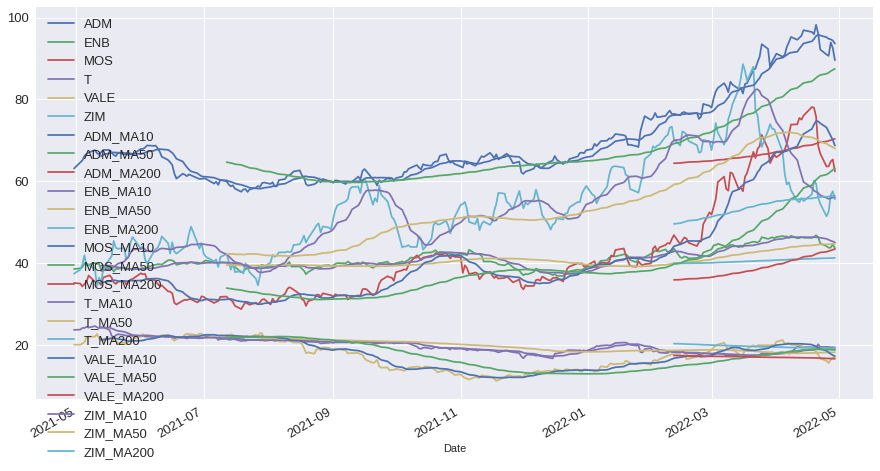

In [ ]:
close.plot(figsize = (15,8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
# lets normalize our data so we can start on the same starting point for all the stocks
# to do this, we take the close price from the first record in the time series, then we divide all of the 
# other stock close number by that value. from there, we multiply the numbers again by 100 to get a positive number
norm = close.div(close.iloc[0]).mul(100)

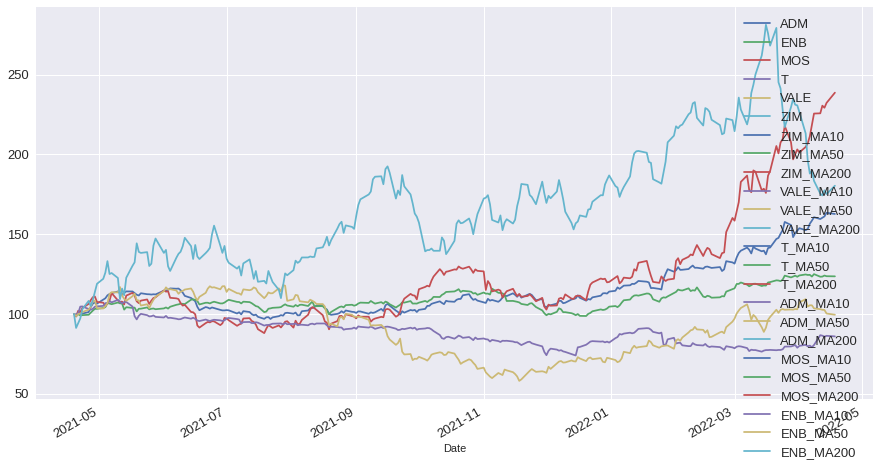

In [ ]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
norm.describe()

,ADM,ENB,MOS,T,VALE,ZIM,ZIM_MA10,ZIM_MA50,ZIM_MA200,VALE_MA10,...,T_MA200,ADM_MA10,ADM_MA50,ADM_MA200,MOS_MA10,MOS_MA50,MOS_MA200,ENB_MA10,ENB_MA50,ENB_MA200
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,114.603304,108.776752,122.914276,88.582439,91.845460,167.149758,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.957877,6.439634,33.711633,8.328792,17.883332,38.724070,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,96.829143,98.448363,87.962118,73.924644,58.003089,91.206348,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,102.546801,104.280360,101.008255,81.160392,74.215130,138.253966,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,109.411371,107.089346,111.426831,89.263088,96.242926,160.857137,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,117.945689,112.760836,127.925449,94.031347,107.977351,186.317456,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,163.450839,124.959866,238.771777,108.802942,118.064849,281.333342,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#in order to get daily returns, use the shift() method
lag1 = close.shift(periods = 1)

In [ ]:
adm = close.ADM.copy().to_frame()

In [ ]:
adm["lag1"] = adm.shift(periods = 1)

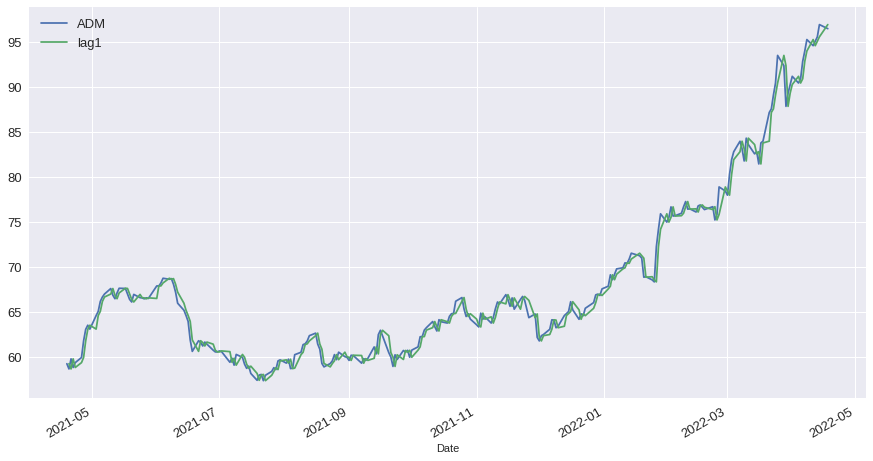

In [ ]:
adm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
# close["adm_diff"] = close.ADM.sub(close.ADM.shift(periods = 1)

In [ ]:
#or we can just use the diff and pct_change methods - which is supposed to do the same thing but....
adm["adm_chg_pct"] = close.ADM.pct_change()

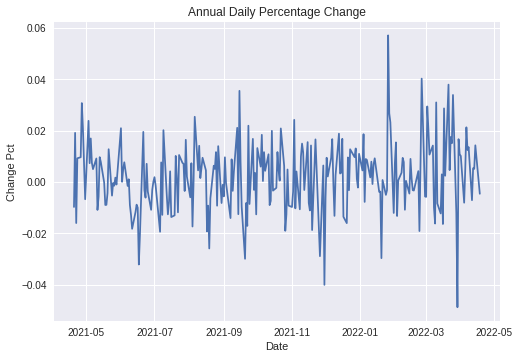

In [ ]:

from importlib import reload
plt=reload(plt)

plt.plot(figsize = (100, 8 ), fontsize = 13)
plt.plot(adm["adm_chg_pct"])

plt.xlabel("Date")
plt.ylabel("Change Pct")
plt.title("Annual Daily Percentage Change")

# Display

plt.show()

In [ ]:
adm.head()

,ADM,lag1,adm_chg_pct
Date,,,
2021-04-19,59.290001,NaN,NaN
2021-04-20,58.709999,59.290001,-0.009782
2021-04-21,59.830002,58.709999,0.019077
2021-04-22,58.869999,59.830002,-0.016046
2021-04-23,59.410000,58.869999,0.009173
